In [1]:
from google.colab import drive
drive.mount("/content/gdrive/")

Mounted at /content/gdrive/


This code is used to find the circles inside the cropped calibration panel.
It allows us to determinate the real area and real perimeter of the chronic wounds. To crop the calibration panel, I used the bounding box that I predicted with my darknet model.
At the end, you can see the circle drawing on the cropped calibration panel. It detects approximately 50% of them. Circles not detected often correspond to blurred image or a calibration panel which is at the extremity of the image. However you can try differents parameters for the HoughCircle function and differents images treatment. I used these parameters because when the circle in the calibration panel is detected, it draws well the circle inside.

In [2]:
!ln -s /content/gdrive/MyDrive/ /mydrive2

In [3]:
from google.colab.patches import cv2_imshow
import numpy as np
import json
import cv2

In [4]:
def load_predictions(file_path):
    with open(file_path, 'r') as file:
        predictions = json.load(file)
    return predictions

In [5]:
def calculate_conversion_factor(objects, calibration_square_cm2, image_width, image_height):
    for obj in objects:
        label = obj["name"]
        confidence = obj["confidence"]
        bbox = list(obj["relative_coordinates"].values())
        if label == "calibrage":
            # Calculate the conversion factors
            area_calibration_pixels = (bbox[2] * bbox[3] * image_width * image_height)
            conversion_factor = calibration_square_cm2 / area_calibration_pixels
            return conversion_factor
    return None

In [6]:
def calculate_real_world_area(mask, conversion_factor):
    # Count non-zero pixels (white pixels) in the mask
    area_wound_pixels = np.count_nonzero(mask)
    if conversion_factor is not None:
        area_reelle_cm2 = area_wound_pixels * conversion_factor
        return area_reelle_cm2
    else:
        return None

In [25]:
import cv2
import numpy as np
import json

# Fonction pour calculer le rayon du cercle dans la calibration
def calculate_calibration_radius(image, calibration_coordinates, marging=10):
    # Convertissez les coordonnées relatives en coordonnées absolues
    image_height, image_width, _ = image.shape
    abs_x = int(calibration_coordinates["center_x"] * image_width - marging)
    abs_y = int(calibration_coordinates["center_y"] * image_height - marging)
    abs_radius = int(min(calibration_coordinates["width"] * image_width, calibration_coordinates["height"] * image_height) / 2 - marging)

    # Définissez la ROI autour de la calibration
    roi = image[abs_y - abs_radius:abs_y + abs_radius, abs_x - abs_radius:abs_x + abs_radius]

    # Convert image in grey level
    normalized_roi = cv2.normalize(roi, None, 0, 255, cv2.NORM_MINMAX)

    if normalized_roi is not None:
      # Convert image in HSV
      hsv_roi = cv2.cvtColor(normalized_roi, cv2.COLOR_BGR2HSV)

      # Define green color in HSV
      lower_green = np.array([40, 50, 50])
      upper_green = np.array([80, 255, 255])

      # Create a mask for green pixels
      green_mask = cv2.inRange(hsv_roi, lower_green, upper_green)

      edges_masked = cv2.bitwise_and(roi, roi, mask=green_mask)
      gray_roi = cv2.cvtColor(edges_masked, cv2.COLOR_BGR2GRAY)

      if gray_roi is not None:

        # Appliquez l'algorithme de détection de cercle (ajustez les paramètres selon vos besoins)
        circles = cv2.HoughCircles(
            gray_roi,
            cv2.HOUGH_GRADIENT,
            dp=1.6,
            minDist=30,
            param1=50,
            param2=30,
            minRadius=int(abs_radius * 0.5),
            maxRadius=int(abs_radius * 1.5),
        )

        if circles is not None:
            circles = np.uint16(np.around(circles))
            a, b, r = circles[0][0][0], circles[0][0][1], circles[0][0][2]

            # Dessiner la circonférence du cercle.
            cv2.circle(roi, (a, b), r, (0, 255, 0), 2)

            # Dessiner un petit cercle (de rayon 1) pour montrer le centre.
            cv2.circle(roi, (a, b), 1, (0, 0, 255), 3)
            cv2_imshow(roi)
            cv2.waitKey(0)
            calibration_radius = r
            return calibration_radius
        else:
            print("Not detected")
            return None


In [ ]:
!unzip -q /mydrive2/chronic_wounds_project/yolov4-2DB/images_yolo.zip -d /mydrive2/chronic_wounds_project/yolov4-2DB/darknet/data

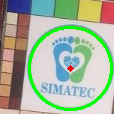

The real-world area of the wound is estimated to be 16.37 cm².
The real-world perimeter of the wound is estimated to be 31.61 cm.
Not detected
Not detected


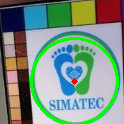

The real-world area of the wound is estimated to be 45.77 cm².
The real-world perimeter of the wound is estimated to be 42.64 cm.
Not detected


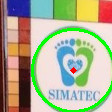

The real-world area of the wound is estimated to be 30.47 cm².
The real-world perimeter of the wound is estimated to be 28.32 cm.
Not detected
Not detected


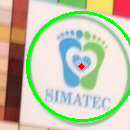

The real-world area of the wound is estimated to be 7.08 cm².
The real-world perimeter of the wound is estimated to be 14.24 cm.


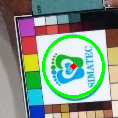

The real-world area of the wound is estimated to be 16.65 cm².
The real-world perimeter of the wound is estimated to be 20.62 cm.


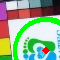

The real-world area of the wound is estimated to be 14.64 cm².
The real-world perimeter of the wound is estimated to be 19.33 cm.
Not detected


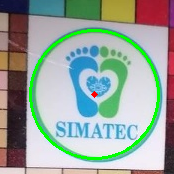

The real-world area of the wound is estimated to be 14.27 cm².
The real-world perimeter of the wound is estimated to be 29.23 cm.
Not detected


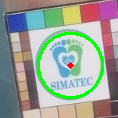

The real-world area of the wound is estimated to be 33.17 cm².
The real-world perimeter of the wound is estimated to be 29.91 cm.
Not detected


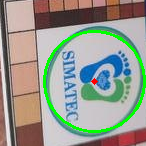

The real-world area of the wound is estimated to be 0.62 cm².
The real-world perimeter of the wound is estimated to be 3.15 cm.


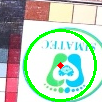

The real-world area of the wound is estimated to be 23.08 cm².
The real-world perimeter of the wound is estimated to be 38.07 cm.


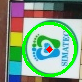

The real-world area of the wound is estimated to be 83.48 cm².
The real-world perimeter of the wound is estimated to be 63.31 cm.
Not detected
Not detected


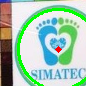

The real-world area of the wound is estimated to be 54.71 cm².
The real-world perimeter of the wound is estimated to be 37.41 cm.
Not detected


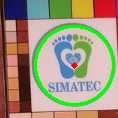

The real-world area of the wound is estimated to be 13.25 cm².
The real-world perimeter of the wound is estimated to be 26.38 cm.


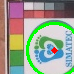

The real-world area of the wound is estimated to be 6.02 cm².
The real-world perimeter of the wound is estimated to be 10.80 cm.
Not detected
Not detected
Not detected
Not detected
Not detected


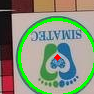

The real-world area of the wound is estimated to be 12.07 cm².
The real-world perimeter of the wound is estimated to be 15.12 cm.


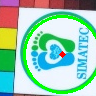

The real-world area of the wound is estimated to be 5.26 cm².
The real-world perimeter of the wound is estimated to be 15.11 cm.
Not detected


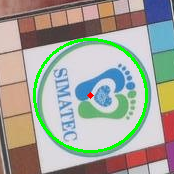

The real-world area of the wound is estimated to be 0.65 cm².
The real-world perimeter of the wound is estimated to be 3.74 cm.
Not detected
Not detected
Not detected


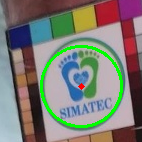

The real-world area of the wound is estimated to be 22.58 cm².
The real-world perimeter of the wound is estimated to be 26.74 cm.
Not detected


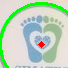

The real-world area of the wound is estimated to be 7.71 cm².
The real-world perimeter of the wound is estimated to be 13.45 cm.


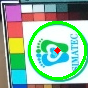

The real-world area of the wound is estimated to be 5.18 cm².
The real-world perimeter of the wound is estimated to be 11.52 cm.
Not detected


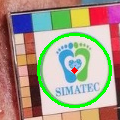

The real-world area of the wound is estimated to be 26.42 cm².
The real-world perimeter of the wound is estimated to be 47.53 cm.
Not detected
Not detected
Not detected
Not detected
Not detected


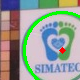

The real-world area of the wound is estimated to be 18.98 cm².
The real-world perimeter of the wound is estimated to be 20.61 cm.


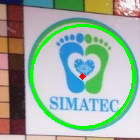

The real-world area of the wound is estimated to be 24.83 cm².
The real-world perimeter of the wound is estimated to be 32.08 cm.


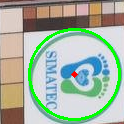

The real-world area of the wound is estimated to be 9.92 cm².
The real-world perimeter of the wound is estimated to be 18.04 cm.


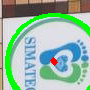

The real-world area of the wound is estimated to be 8.72 cm².
The real-world perimeter of the wound is estimated to be 16.91 cm.


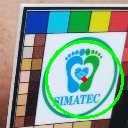

The real-world area of the wound is estimated to be 13.89 cm².
The real-world perimeter of the wound is estimated to be 17.60 cm.
Not detected


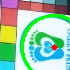

The real-world area of the wound is estimated to be 14.11 cm².
The real-world perimeter of the wound is estimated to be 17.97 cm.


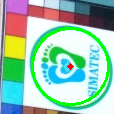

The real-world area of the wound is estimated to be 13.71 cm².
The real-world perimeter of the wound is estimated to be 17.93 cm.


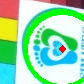

The real-world area of the wound is estimated to be 15.28 cm².
The real-world perimeter of the wound is estimated to be 18.93 cm.
Not detected
Not detected


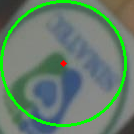

The real-world area of the wound is estimated to be 2.80 cm².
The real-world perimeter of the wound is estimated to be 7.38 cm.


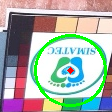

The real-world area of the wound is estimated to be 42.92 cm².
The real-world perimeter of the wound is estimated to be 37.03 cm.
Not detected
Not detected
Not detected


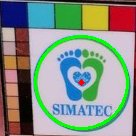

The real-world area of the wound is estimated to be 25.51 cm².
The real-world perimeter of the wound is estimated to be 38.70 cm.


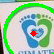

The real-world area of the wound is estimated to be 48.19 cm².
The real-world perimeter of the wound is estimated to be 36.43 cm.
Not detected
Not detected
Not detected
Not detected
Not detected
Not detected
Not detected
Not detected


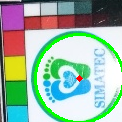

The real-world area of the wound is estimated to be 15.13 cm².
The real-world perimeter of the wound is estimated to be 20.20 cm.
Not detected


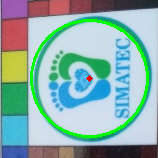

The real-world area of the wound is estimated to be 7.17 cm².
The real-world perimeter of the wound is estimated to be 14.60 cm.
Not detected


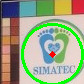

The real-world area of the wound is estimated to be 63.62 cm².
The real-world perimeter of the wound is estimated to be 49.08 cm.


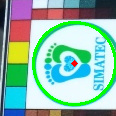

The real-world area of the wound is estimated to be 5.74 cm².
The real-world perimeter of the wound is estimated to be 15.27 cm.


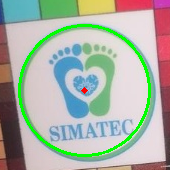

The real-world area of the wound is estimated to be 4.91 cm².
The real-world perimeter of the wound is estimated to be 14.61 cm.
Not detected


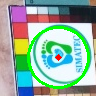

The real-world area of the wound is estimated to be 11.39 cm².
The real-world perimeter of the wound is estimated to be 16.27 cm.
Not detected


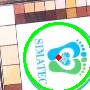

The real-world area of the wound is estimated to be 14.13 cm².
The real-world perimeter of the wound is estimated to be 40.99 cm.


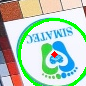

The real-world area of the wound is estimated to be 2.63 cm².
The real-world perimeter of the wound is estimated to be 10.09 cm.


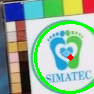

The real-world area of the wound is estimated to be 57.58 cm².
The real-world perimeter of the wound is estimated to be 41.69 cm.


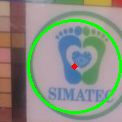

The real-world area of the wound is estimated to be 22.47 cm².
The real-world perimeter of the wound is estimated to be 28.98 cm.


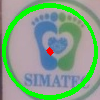

The real-world area of the wound is estimated to be 22.47 cm².
The real-world perimeter of the wound is estimated to be 28.98 cm.
Not detected
Not detected


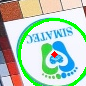

The real-world area of the wound is estimated to be 2.68 cm².
The real-world perimeter of the wound is estimated to be 10.13 cm.


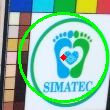

The real-world area of the wound is estimated to be 14.83 cm².
The real-world perimeter of the wound is estimated to be 22.00 cm.


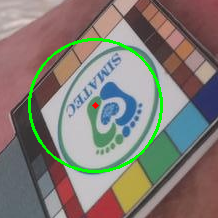

Not detected
Not detected
Not detected
Not detected
Not detected


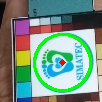

The real-world area of the wound is estimated to be 4.11 cm².
The real-world perimeter of the wound is estimated to be 13.63 cm.
Not detected


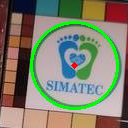

The real-world area of the wound is estimated to be 7.28 cm².
The real-world perimeter of the wound is estimated to be 12.81 cm.


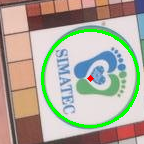

The real-world area of the wound is estimated to be 0.76 cm².
The real-world perimeter of the wound is estimated to be 7.71 cm.


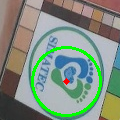

The real-world area of the wound is estimated to be 6.84 cm².
The real-world perimeter of the wound is estimated to be 12.10 cm.


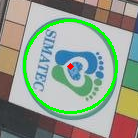

The real-world area of the wound is estimated to be 13.84 cm².
The real-world perimeter of the wound is estimated to be 17.29 cm.
Not detected
Not detected


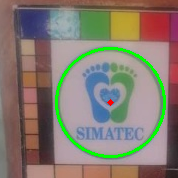

The real-world area of the wound is estimated to be 16.45 cm².
The real-world perimeter of the wound is estimated to be 23.27 cm.
Not detected
Not detected
Not detected
Not detected
Not detected
Not detected
Not detected
Not detected
Not detected


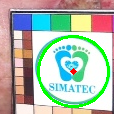

The real-world area of the wound is estimated to be 5.24 cm².
The real-world perimeter of the wound is estimated to be 27.70 cm.
Not detected
Not detected


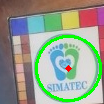

The real-world area of the wound is estimated to be 52.93 cm².
The real-world perimeter of the wound is estimated to be 44.60 cm.


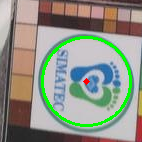

The real-world area of the wound is estimated to be 25.08 cm².
The real-world perimeter of the wound is estimated to be 27.06 cm.
Not detected


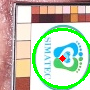

The real-world area of the wound is estimated to be 1.76 cm².
The real-world perimeter of the wound is estimated to be 13.10 cm.
Not detected
Not detected
Not detected
Not detected


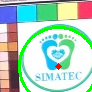

The real-world area of the wound is estimated to be 6.92 cm².
The real-world perimeter of the wound is estimated to be 13.65 cm.
Not detected


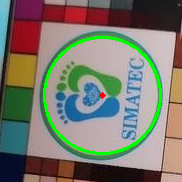

The real-world area of the wound is estimated to be 8.53 cm².
The real-world perimeter of the wound is estimated to be 14.88 cm.
Not detected
Not detected
Not detected
Not detected
Not detected
Not detected
Not detected
Not detected
Not detected
Not detected
Not detected
Not detected
Not detected


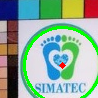

The real-world area of the wound is estimated to be 49.81 cm².
The real-world perimeter of the wound is estimated to be 30.22 cm.


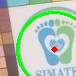

The real-world area of the wound is estimated to be 13.27 cm².
The real-world perimeter of the wound is estimated to be 19.86 cm.


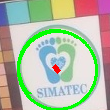

The real-world area of the wound is estimated to be 11.94 cm².
The real-world perimeter of the wound is estimated to be 18.84 cm.


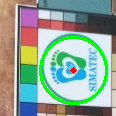

The real-world area of the wound is estimated to be 0.31 cm².
The real-world perimeter of the wound is estimated to be 2.30 cm.


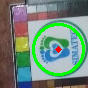

The real-world area of the wound is estimated to be 0.60 cm².
The real-world perimeter of the wound is estimated to be 2.90 cm.
Not detected


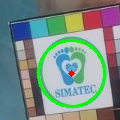

The real-world area of the wound is estimated to be 38.31 cm².
The real-world perimeter of the wound is estimated to be 31.96 cm.


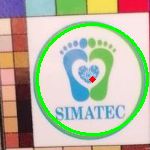

The real-world area of the wound is estimated to be 7.94 cm².
The real-world perimeter of the wound is estimated to be 13.60 cm.
Not detected


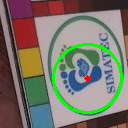

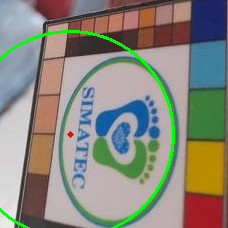

The real-world area of the wound is estimated to be 0.60 cm².
The real-world perimeter of the wound is estimated to be 3.29 cm.
Not detected
Not detected
Not detected


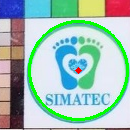

The real-world area of the wound is estimated to be 15.10 cm².
The real-world perimeter of the wound is estimated to be 29.61 cm.


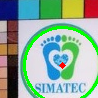

The real-world area of the wound is estimated to be 49.71 cm².
The real-world perimeter of the wound is estimated to be 30.44 cm.
Not detected
Not detected


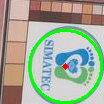

The real-world area of the wound is estimated to be 85.16 cm².
The real-world perimeter of the wound is estimated to be 44.67 cm.


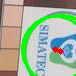

The real-world area of the wound is estimated to be 101.35 cm².
The real-world perimeter of the wound is estimated to be 48.73 cm.
Not detected


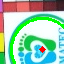

The real-world area of the wound is estimated to be 5.71 cm².
The real-world perimeter of the wound is estimated to be 12.48 cm.


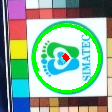

The real-world area of the wound is estimated to be 5.04 cm².
The real-world perimeter of the wound is estimated to be 11.72 cm.
Not detected
Not detected


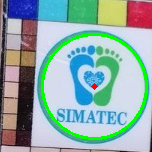

The real-world area of the wound is estimated to be 20.06 cm².
The real-world perimeter of the wound is estimated to be 20.48 cm.
Not detected
Not detected
Not detected
Not detected


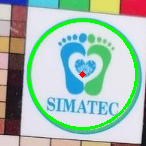

The real-world area of the wound is estimated to be 15.58 cm².
The real-world perimeter of the wound is estimated to be 32.54 cm.
Not detected


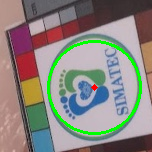

The real-world area of the wound is estimated to be 1.17 cm².
The real-world perimeter of the wound is estimated to be 4.43 cm.


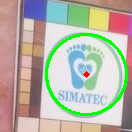

The real-world area of the wound is estimated to be 29.10 cm².
The real-world perimeter of the wound is estimated to be 46.74 cm.
Not detected
Not detected
Not detected


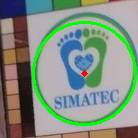

The real-world area of the wound is estimated to be 22.38 cm².
The real-world perimeter of the wound is estimated to be 25.19 cm.


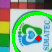

The real-world area of the wound is estimated to be 77.19 cm².
The real-world perimeter of the wound is estimated to be 60.67 cm.
Not detected
Not detected


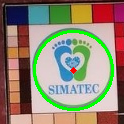

The real-world area of the wound is estimated to be 35.41 cm².
The real-world perimeter of the wound is estimated to be 32.18 cm.


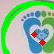

The real-world area of the wound is estimated to be 52.60 cm².
The real-world perimeter of the wound is estimated to be 39.21 cm.


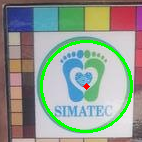

The real-world area of the wound is estimated to be 26.83 cm².
The real-world perimeter of the wound is estimated to be 30.19 cm.
Not detected
Not detected


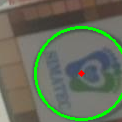

The real-world area of the wound is estimated to be 14.04 cm².
The real-world perimeter of the wound is estimated to be 22.82 cm.
Not detected
Not detected


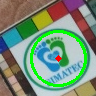

The real-world area of the wound is estimated to be 6.33 cm².
The real-world perimeter of the wound is estimated to be 11.28 cm.


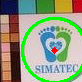

The real-world area of the wound is estimated to be 30.34 cm².
The real-world perimeter of the wound is estimated to be 28.14 cm.


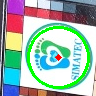

The real-world area of the wound is estimated to be 29.63 cm².
The real-world perimeter of the wound is estimated to be 41.71 cm.
Not detected
Not detected
Not detected
Not detected
Not detected
Not detected


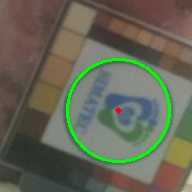

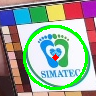

The real-world area of the wound is estimated to be 10.45 cm².
The real-world perimeter of the wound is estimated to be 32.07 cm.
Not detected
Not detected


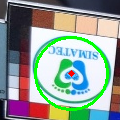

The real-world area of the wound is estimated to be 7.65 cm².
The real-world perimeter of the wound is estimated to be 23.89 cm.


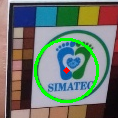

The real-world area of the wound is estimated to be 19.35 cm².
The real-world perimeter of the wound is estimated to be 20.94 cm.


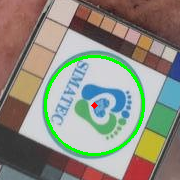

The real-world area of the wound is estimated to be 1.53 cm².
The real-world perimeter of the wound is estimated to be 7.30 cm.
Not detected
Not detected


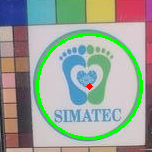

The real-world area of the wound is estimated to be 8.18 cm².
The real-world perimeter of the wound is estimated to be 17.27 cm.
Not detected
Not detected
Not detected
Not detected
Not detected
Not detected
Not detected


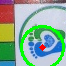

The real-world area of the wound is estimated to be 5.15 cm².
The real-world perimeter of the wound is estimated to be 14.43 cm.


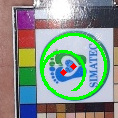

The real-world area of the wound is estimated to be 2.22 cm².
The real-world perimeter of the wound is estimated to be 9.47 cm.
Not detected
Not detected
Not detected
Not detected
Not detected
Percentage of circles detected : 40.52863436123348


In [24]:
# Given calibration details
radius_calibration_cm = 1.35
side_length_calibration_cm = 3.5

# Load predictions
predictions_file_path = "/mydrive2/chronic_wounds_project/yolov4-2DB/darknet/data/my_predictions.txt"
predictions = load_predictions(predictions_file_path)

number_of_images = 0
detected_circles = 0

# For each detected object, measure the area in pixels
for prediction in predictions:
    image_path = "/mydrive2/chronic_wounds_project/yolov4-2DB/darknet/" + prediction["filename"]
    image = cv2.imread(image_path)
    objects = prediction["objects"]
    for obj in objects:
      if obj["name"] == "calibration" and prediction["filename"][17:22] != "photo":
        number_of_images += 1
        calibration_coordinates = obj["relative_coordinates"]

        mask_filename = prediction["filename"].replace("images_yolo", "mask").replace(".jpg", ".png")
        mask_filename = f"/mydrive2/chronic_wounds_project/Segmentation:U-Net_2DB/" + mask_filename
        mask = cv2.imread(mask_filename, cv2.IMREAD_GRAYSCALE)
        calibration_radius = calculate_calibration_radius(image, calibration_coordinates)
        # Calculate the conversion factor
        if mask is not None:
          if calibration_radius is not None:
            detected_circles += 1
            conversion_factor = radius_calibration_cm/calibration_radius
            # Calculate the real-world area of the wound
            area_wound_pixels = cv2.countNonZero(mask)
            area_wound_reelle_cm2 = conversion_factor*conversion_factor*area_wound_pixels

            # Calculate the perimeter of the shape
            contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            perimeter_reelle_cm = 0
            for contour in contours:
              perimeter_reelle_cm += cv2.arcLength(contour, True)*conversion_factor
            if area_wound_reelle_cm2 is not None:
              print(f"The real-world area of the wound is estimated to be {area_wound_reelle_cm2:.2f} cm².")
              print(f"The real-world perimeter of the wound is estimated to be {perimeter_reelle_cm:.2f} cm.")

          #if mask is not None:
            #cv2_imshow(mask)
          #cv2.waitKey(0)

print(f"Percentage of circles detected : {(detected_circles/number_of_images)*100}")

cv2.destroyAllWindows()  # Close all OpenCV windows when done